In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data, get columns Mv, B-V, remove redundant
df = pd.read_csv('BrightestStars.csv')[['Star', 'Mv', 'B-V']]
df.dropna(inplace=True)
df.set_index('Star', inplace=True)

# Have a look at the data
df.head()

,Mv,B-V
Star,,
Sun,4.82,0.63
alp,-0.40,-0.11
bet,2.00,0.34
gam,-3.10,-0.23
bet,3.80,0.62


In [117]:
# From: https://stackoverflow.com/a/41451654
# Convert B-V to a reasonable RGB
def bv2rgb(bv):
    if bv < -0.40: bv = -0.40
    if bv > 2.00: bv = 2.00

    r = 0.0
    g = 0.0
    b = 0.0

    if  -0.40 <= bv<0.00:
        t=(bv+0.40)/(0.00+0.40)
        r=0.61+(0.11*t)+(0.1*t*t)
    elif 0.00 <= bv<0.40:
        t=(bv-0.00)/(0.40-0.00)
        r=0.83+(0.17*t)
    elif 0.40 <= bv<2.10:
        t=(bv-0.40)/(2.10-0.40)
        r=1.00
    if  -0.40 <= bv<0.00:
        t=(bv+0.40)/(0.00+0.40)
        g=0.70+(0.07*t)+(0.1*t*t)
    elif 0.00 <= bv<0.40:
        t=(bv-0.00)/(0.40-0.00)
        g=0.87+(0.11*t)
    elif 0.40 <= bv<1.60:
        t=(bv-0.40)/(1.60-0.40)
        g=0.98-(0.16*t)
    elif 1.60 <= bv<2.00:
        t=(bv-1.60)/(2.00-1.60)
        g=0.82-(0.5*t*t)
    if  -0.40 <= bv<0.40:
        t=(bv+0.40)/(0.40+0.40)
        b=1.00
    elif 0.40 <= bv<1.50:
        t=(bv-0.40)/(1.50-0.40)
        b=1.00-(0.47*t)+(0.1*t*t)
    elif 1.50 <= bv<1.94:
        t=(bv-1.50)/(1.94-1.50)
        b=0.63-(0.6*t*t)

    return [r, g, b]

color = df['B-V'].apply(bv2rgb)

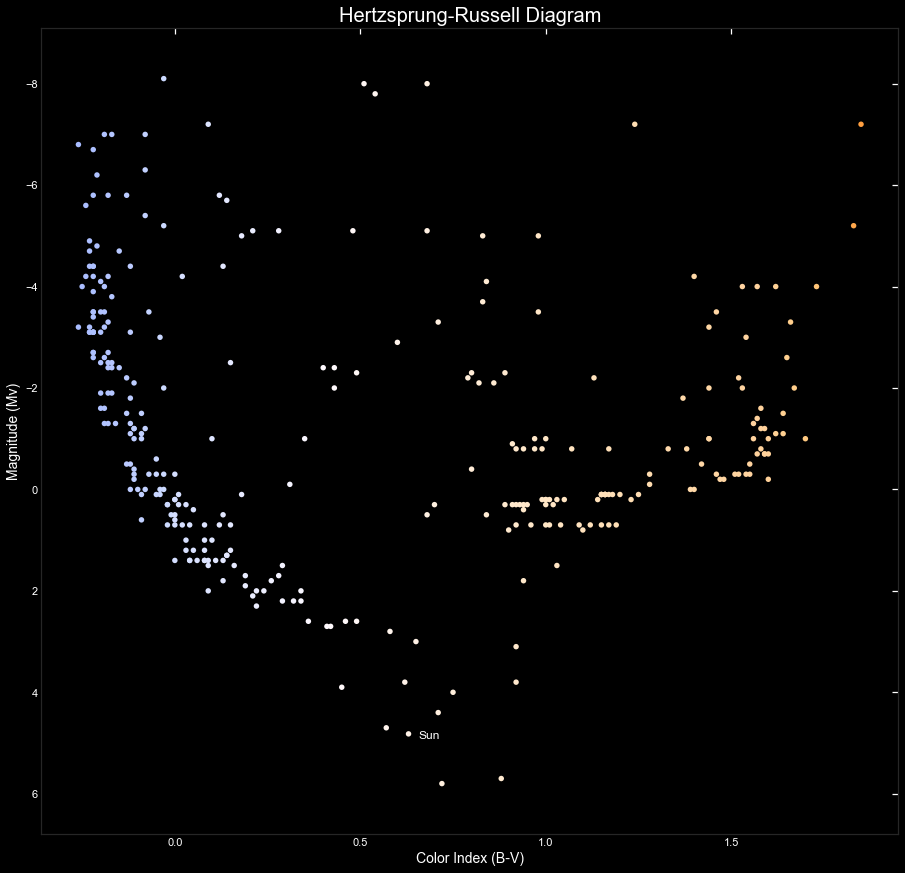

In [169]:
fig = plt.figure(
    figsize=(14, 14),
    facecolor='black'
    )
ax = fig.add_axes([.1, .1, .85, .8])

ax.set_facecolor('black')
ax.set_title('Hertzsprung-Russell Diagram', color='white', fontsize=20)
ax.set_xlabel('Color Index (B-V)', color='white', fontsize=14)
ax.set_ylabel('Magnitude (Mv)', color='white', fontsize=14)
ax.set_xlim(min(df['B-V']) - .1, max(df['B-V']) + .1)
ax.set_ylim(max(df['Mv']) + 1.0, min(df['Mv']) - 1.0)
ax.tick_params(top='off', right='off', direction='in', colors='white')

ax.scatter( df['B-V'], df['Mv'],
    marker='o',
    s=[30] * len(df),
    facecolors=color,
    linewidth=0)

# Add an annotation for the sun
sun = df.loc['Sun']
ax.annotate(sun.name, (sun['B-V'], sun['Mv']),
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=12, color='white')

# Save a higher resolution version 
plt.savefig("Hertzsprung-Russell.png", facecolor='black', edgecolor='white', dpi=240)